In [ ]:
# Importing required libraries.
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
# for one hot encoding.
from tensorflow.keras.utils import to_categorical

In [ ]:
# loading the dataset.
# Read the documentation here.
# https://keras.io/api/datasets/cifar10/
(xtrain, ytrain), (xtest, ytest) = keras.datasets.cifar10.load_data()

In [ ]:
##
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
## limitting number of images for saving resources and computation.
## If you have good GPU's you may try take the whole dataset, otherwise the system may crash.
xtrain=xtrain[:5000]
ytrain=ytrain[:5000]
xtest=xtest[:1000]
ytest=ytest[:1000]

In [ ]:
## converting to input format of AlexNet.
## Input shape according to AlexNet implemenation is 227x227.
xtrain=np.array([cv2.resize(i, (227,227)) for i in xtrain])  
xtest=np.array([cv2.resize(i, (227,227)) for i in xtest])

In [ ]:
print(xtrain[0].shape)
print(xtest[0].shape)

(227, 227, 3)
(227, 227, 3)


In [ ]:
## let's rescale all pixel values to [0,1] range.
# convert from integers to floats
# normalize to range 0-1
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255

In [ ]:
xtrain[0].shape

(227, 227, 3)

In [ ]:
ytrain = to_categorical(ytrain, 10) # 10 indicates total number of unique labels.
ytest = to_categorical(ytest, 10)

In [ ]:
xtrain[0].shape

(227, 227, 3)

In [ ]:
# You can read AlexNet original research paper here.
# https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf
# Implementation is done according to this paper.
# The original paper says that input image dimensions are 224x224x3. However, it returns error due to padding issues.
# Thus the right way is to take input dimension as 227x227x3.

In [ ]:
# Build AlexNet.

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

In [1]:
# To understand how to read model summary in detail please refer the url https://github.com/sandyiswell/HPtuning_OpenCVbasics_TransferLearning/blob/main/6_padding.ipynb

In [ ]:
## compile model.
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
# fit model --> Training.
history = model.fit(xtrain, ytrain, epochs=20, batch_size=32, validation_data=(xtest, ytest), verbose=1)

Epoch 1/20
157/157 [==============================] - 23s 70ms/step - loss: 49.7879 - accuracy: 0.1128 - val_loss: 2.3087 - val_accuracy: 0.0900
Epoch 2/20
157/157 [==============================] - 10s 64ms/step - loss: 2.3335 - accuracy: 0.0930 - val_loss: 2.3061 - val_accuracy: 0.0900
Epoch 3/20
157/157 [==============================] - 10s 64ms/step - loss: 2.3865 - accuracy: 0.1136 - val_loss: 2.2547 - val_accuracy: 0.1970
Epoch 4/20
157/157 [==============================] - 10s 63ms/step - loss: 2.3315 - accuracy: 0.1332 - val_loss: 2.6223 - val_accuracy: 0.1130
Epoch 5/20
157/157 [==============================] - 10s 63ms/step - loss: 2.2485 - accuracy: 0.1778 - val_loss: 2.2012 - val_accuracy: 0.1730
Epoch 6/20
157/157 [==============================] - 10s 63ms/step - loss: 2.0702 - accuracy: 0.2532 - val_loss: 2.3785 - val_accuracy: 0.2360
Epoch 7/20
157/157 [==============================] - 10s 64ms/step - loss: 1.9126 - accuracy: 0.3094 - val_loss: 1.8496 - val_accuracy

In [ ]:
# evaluate model
__, acc = model.evaluate(xtest, ytest, verbose=0)
print("accuracy: ", acc*100)

accuracy:  49.300000071525574


In [2]:
## The model has only 49% of accuracy. 
## You may tune the model for better accuracy.
## Here our aim is to learn building AlexNet rather than tuning the model.

In [ ]:
# Predictions.
# You can predict using the model.
# Predictions are done on unseen data.
# Here I am taking an xtest image as an example.
model.predict(xtest[:1])

array([[0.42254454, 0.0024902 , 0.1557005 , 0.18803322, 0.01902289,
        0.08172279, 0.02175559, 0.01827072, 0.08560151, 0.00485796]],
      dtype=float32)

In [ ]:
# You can see that the prediction returns an array with ten numbers.
# These numbers are nothing but the prediction probability values associated with the ten labels.
# You need to read the official documentation of Keras cifar10 dataset to know these labels and their order of occurence.
# The label pertaining to the highest probability valued index is taken as the prediction result.
# Here the highest valued number is the zeroth indexed one, which is labelled as an airplane as per the documentation.

In [ ]:
from google.colab.patches import cv2_imshow

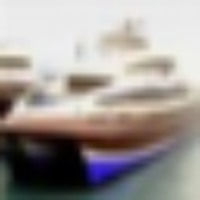

In [ ]:
## for visualizing images
## To understand which image the model actually predicted.
cv2_imshow(cv2.resize((xtest[1]*255), (200,200)))  ## I have resized the output shape to 200x200 for viewing better.

In [ ]:
## It turns out that the predicted image is that of a boat.
## Obviously our model needs to be trained fore more epochs by taking more images followed by hyperparameter tuning.

In [ ]:
# The following link is a good reference blog.
# https://towardsdatascience.com/implementing-alexnet-cnn-architecture-using-tensorflow-2-0-and-keras-2113e090ad98